# Dijkstra

## Optimal substructure

**The shortest path between two nodes contains other shortest paths.**

## Inputs

+ The input graph should be **directed graph**.
+ All the edge weights should be **no negative**.
+ The source node id in the graph.

## Auxiliary data structure

+ `shortest_path_table:` stores the shortest path dist and the predecessor node in the shortest path from source node to all the nodes in graph.

## Outputs

+ The list of all the shortest path from the source node to the other nodes in the graph.

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

In [5]:
import algviz

class DjkstraSolver:
    def __init__(self, nodes, edges, source):
        self._nodes_num = len(nodes)
        self._viz = algviz.Visualizer(4, 1, layout=True)
        self._graph_nodes = algviz.parseGraph(nodes, edges)
        self._graph = self._viz.createGraph(self._graph_nodes, 'Graph')
        self._log = self._viz.createLogger(1, show_line_num=False)
        self._log2 = self._viz.createLogger(3, show_line_num=False)
        self._shortest_path_table = self._viz.createTable(3, self._nodes_num+1,
            [[i-1 for i in range(self._nodes_num+1)], ['♾' for _ in range(self._nodes_num+1)],
             [None for _ in range(self._nodes_num+1)]], 'shortest_path_table', show_index=False)
        self._shortest_path_table[0][0] = 'node'
        self._shortest_path_table[1][0] = 'dist'
        self._shortest_path_table[2][0] = 'pred'
        self._source_node = self._graph_nodes[source]
        self._shortest_path_table[1][self._source_node.val+1] = 0
        self._visited_nodes = set()

    def run(self):
        self._viz.display()
        while len(self._visited_nodes) < self._nodes_num:
            node, dist = self.extract_min()
            self._graph.markNode(algviz.color_tan, node, True)
            self._shortest_path_table.mark(algviz.color_tan, 0, node.val+1, True)
            self._log.write('Current shortest path: {} -> ... -> {}'.format(self._source_node.val, node.val))
            self._viz.display(0.5)
            for (neighbor, edge) in node.neighbors():
                neighbor_dist = self._shortest_path_table[1][neighbor.val+1]
                self._graph.markNode(algviz.color_green_yellow, neighbor, True)
                self._shortest_path_table.mark(algviz.color_green_yellow, 0, neighbor.val+1, True)
                if node != self._source_node:
                    self.mark_min_path(neighbor, algviz.color_aqua)
                    self._log2.write('{} -> ... -> {} current minimum distance: {}'.format(
                        self._source_node.val, neighbor.val, neighbor_dist))
                    self._viz.display()
                    self.mark_min_path(node, algviz.color_pink)
                    self._graph.markEdge(algviz.color_pink, node, neighbor)
                    self._log2.write('{} -> ... -> {} -> ... -> {} distance: {}'.format(
                        self._source_node.val, node.val, neighbor.val, dist + edge))
                    self._viz.display()
                if neighbor_dist == '♾' or dist + edge < neighbor_dist:
                    self._shortest_path_table[1][neighbor.val+1] = dist + edge
                    self._shortest_path_table[2][neighbor.val+1] = node.val
                    self._shortest_path_table.mark(algviz.color_pink, 1, neighbor.val+1)
                    self._shortest_path_table.mark(algviz.color_pink, 2, neighbor.val+1)
                    self._log2.write('Update the shortest path of node: {}'.format(neighbor.val))
                    self._viz.display(1)
                self._graph.removeMark(algviz.color_green_yellow)
                self._shortest_path_table.removeMark(algviz.color_green_yellow)
                self._viz.display(1)
            self._graph.removeMark(algviz.color_tan)
            self._shortest_path_table.removeMark(algviz.color_tan)
        self._viz.display(); self._viz.layout()

    def extract_min(self):
        min_dist, min_index = None, None
        for i in range(self._nodes_num):
            dist = self._shortest_path_table[1][i+1]
            if i not in self._visited_nodes and dist != '♾' and (
                min_dist == None or dist < min_dist):
                min_dist = dist
                min_index = i
        self._visited_nodes.add(min_index)
        return self._graph_nodes[min_index], min_dist

    def mark_min_path(self, node, color):
        pred = self._shortest_path_table[2][node.val+1]
        while pred != None and node != self._source_node:
            pred_node = self._graph_nodes[pred]
            self._graph.markNode(color, pred_node)
            self._graph.markEdge(color, pred_node, node)
            node = pred_node
            pred = self._shortest_path_table[2][node.val+1]

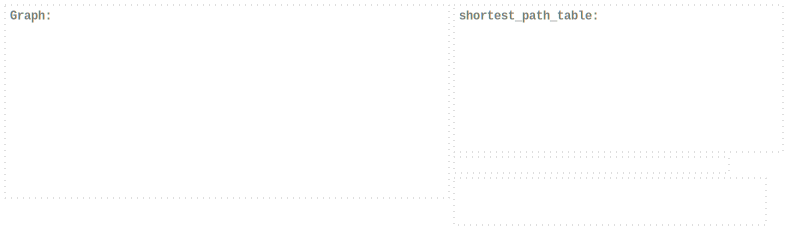

In [6]:
# Test case1.
nodes = [0, 1, 2, 3, 4, 5, 6]
edges = [(0, 1, 2), (0, 6, 6), (0, 4, 8),
        (1, 2, 3), (1, 5, 1),
        (2, 3, 1),
        (3, 4, 3),
        (5, 3, 2), (5, 6, 1), (5, 2, 1),
        (6, 4, 3)]
DjkstraSolver(nodes, edges, 0).run()

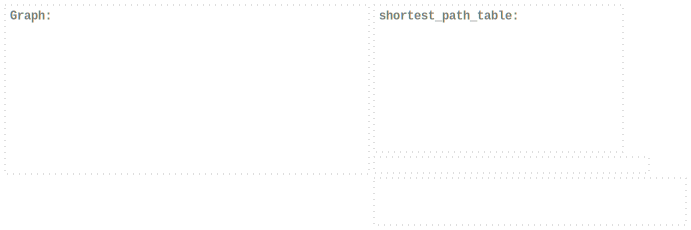

In [7]:
# Test case2, graph with cycle.
nodes = [0, 1, 2, 3, 4]
edges = [(0, 1, 6), (0, 2, 2), (0, 3, 2),
        (2, 1, 3), (2, 3, 1),
        (3, 4, 1),
        (4, 0, 3), (4, 1, 1)]
DjkstraSolver(nodes, edges, 4).run()

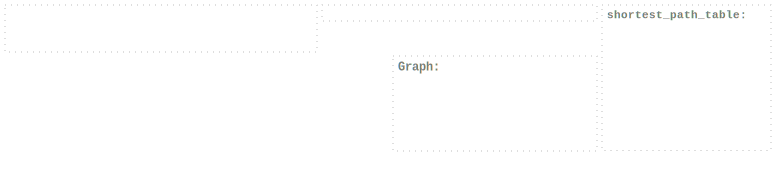

In [8]:
# Test case3, failed when there exist a cycle with negative edge value.
nodes = [0, 1, 2]
edges = [(0, 1, 1), (1, 2, 1), (2, 0, -3)]
DjkstraSolver(nodes, edges, 0).run()